# Dimensionality Reduction



Data are often high dimensional. Reducing the dimensionality allow us to better examine their structure. 
There are several strategies we can follow to this end:

In [84]:
from chelo.datasets import BCFactorDataset

dataset = BCFactorDataset()
dataset.load_data()
X, y = dataset.to_numpy()

# Convert problem to three class
y = (y.ravel() < 0)  + 2*(y.ravel() > 3) + 0.

print(X.shape)

(800, 15)


It is a good strategy to normalize our data

In [85]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Principal Component Analysis (PCA) is perhaps the most common way to do so.
PCA finds a linear projection that maximizes variance (information) in the projected space. 

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [87]:
print(pca.explained_variance_ratio_)

[0.40523538 0.16229717]


The first two components contain 56+% of the information for this dataset.


We can now visualize the data

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [90]:
x_reduced = pca.transform(X)

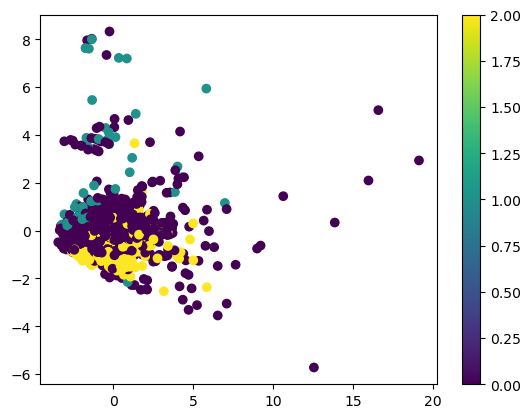

In [91]:
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')

We see that data are not well separated and we can verify this by fitting a classifier. 
Note that we have now lost discriminative information and we can no longer recover it.

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model = LogisticRegression()
model.fit(x_reduced, y)
print(model.score(x_reduced, y))

0.7275


Using Linear Discriminant Analysis allow us learn projections that keep class information. 
The maximum number of dimensions is the number of classes - 1.

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

x_reduced = lda.fit_transform(X, y)

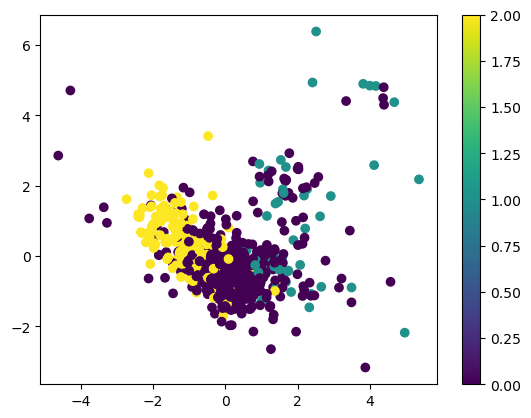

In [95]:
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')

Let's use a more advanced method for visualization.
t-SNE learns embeddings that keep the local structure of the space.

In [96]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE(n_components=2)
x_reduced = tsne.fit_transform(X)

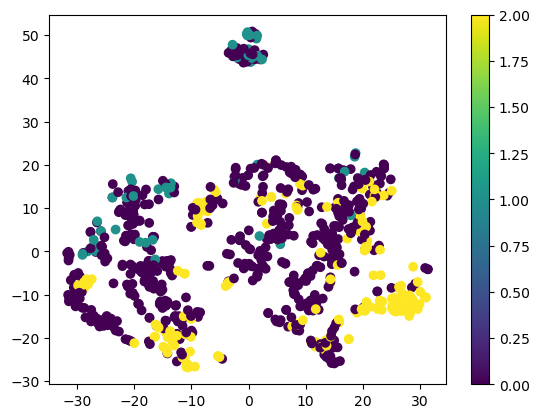

In [98]:
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')

Changing the parameters of t-SNE allows for getting different views of the data:

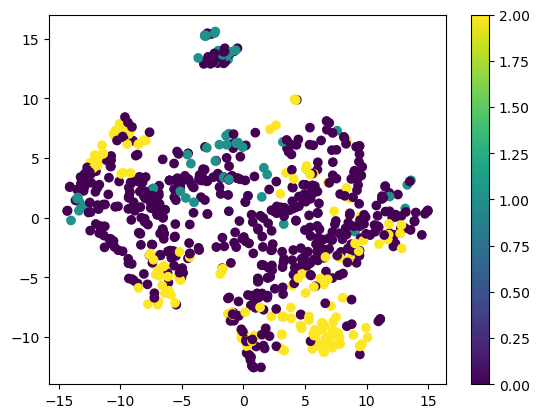

In [99]:
tsne = TSNE(n_components=2, perplexity=100)
x_reduced = tsne.fit_transform(X)
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')

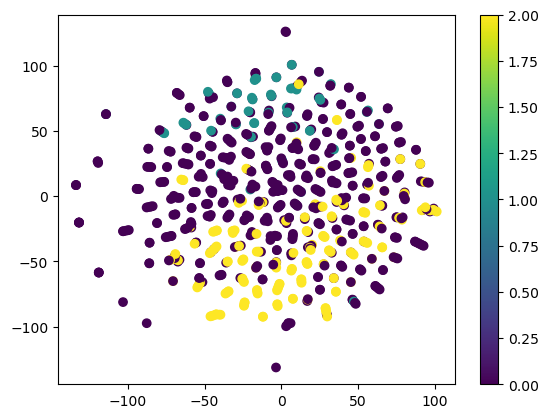

In [100]:
tsne = TSNE(n_components=2, perplexity=1)
x_reduced = tsne.fit_transform(X)
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')

We can also use UMAP (pip install umap-learn):

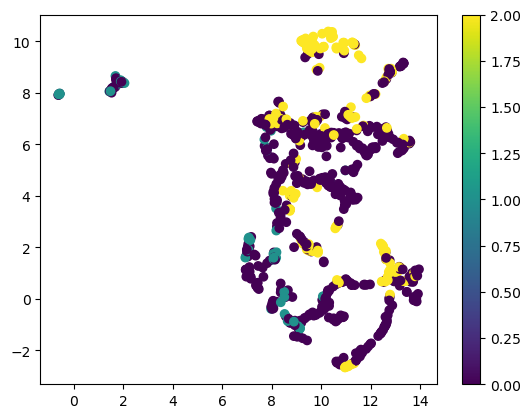

In [101]:
import umap

tsne = umap.UMAP(n_components=2)
x_reduced = tsne.fit_transform(X)
scat = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y)
cb = plt.colorbar(scat, spacing='proportional')
